In [1]:
# Setup
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

from graph import Graph
from walkers import RandomWalker, GreedyUnbiasedWalker
from simulator import Simulator

Conjecture for performance of expected degree distribution: 


Let $d_i$ be the degree distubution, $p_i$ be its corresponding probabilty distribution, $d_{exp}$ be the expected degree, and $p_d$ be the denominator of $p_i$.

Compute performance score: $\LARGE \sum (\frac{d_i^2\times p_i}{d_{exp}}) + | d_{max(p_i)}- (d_{max(p_i)}\times max(p_i)) + \frac{d_{max(p_i)}\times max(p_i)}{d_{min(p_j)}\times min(p_j)}|/(p_d\times d_{exp})$, where $d_{max(p_i)}$ is the degree with the largest probability and $d_{min(p_j)}$ is the degree with the smallest probability.

Procedure:
1. multiply each degree with its probability: $\{d_i\times p_i\}$.
2. normalize by expected degree: $\{\frac{d_i\times p_i}{d_{exp}}\}$.
3. sum product of each degree with their normalized probability: $\sum (d_i \times \frac{d_i\times p_i}{d_{exp}})$.
4. add "weight": $| d_{max(p_i)}- (d_{max(p_i)}\times max(p_i)) + \frac{d_{max(p_i)}\times max(p_i)}{d_{min(p_j)}\times min(p_j)}|/(p_d\times d_{exp})$, where $d_{max(p_i)}$ is the degree with the largest probability and $d_{min(p_j)}$ is the degree with the smallest probability.

The closer the score is to expected degree, the better the performance.

Example: expected degree = 10


1. $d1=8\times \frac{3}{4} + 16\times \frac{1}{4} \implies \{6,4\} \implies \{\frac{6}{10}, \frac{4}{10}\} \implies 8\times \frac{6}{10} + 16\times \frac{4}{10} = 11.2 \implies 11.2 + |8-6 + \frac{6}{4}|/40=11.2875$.


2. $d2=12\times \frac{3}{4} + 4\times \frac{1}{4} \implies \{9,1\} \implies \{\frac{9}{10}, \frac{1}{10}\} \implies 12\times \frac{9}{10} + 4\times \frac{1}{10} = 11.2\implies 11.2+|12-9 + \frac{9}{1}|/40=11.5$.


3. $d3=4\times \frac{3}{4} + 28\times \frac{1}{4} \implies \{3,7\} \implies \{\frac{3}{10}, \frac{7}{10}\} \implies 4\times \frac{3}{10} + 28\times \frac{7}{10} = 20.8 \implies 20.8+|4-3+\frac{3}{7}|/40=20.83571$.

In [2]:
def score(d_dist, expected_d):
    from fractions import Fraction
    score = 0
    deg, deg_product = [],[]
    divisor = int(str(Fraction(min(d_dist.values())).limit_denominator()).split('/')[1])
    for key in sorted(d_dist, key=d_dist.get, reverse=True):
        score += key*(key*d_dist[key]/expected_d)
        deg.append(key)
        deg_product.append(key*d_dist[key])
    score += abs( (deg[0]-deg_product[0]) + (deg_product[0]/deg_product[-1]) )/(divisor*expected_d)
    return round(score, 5)

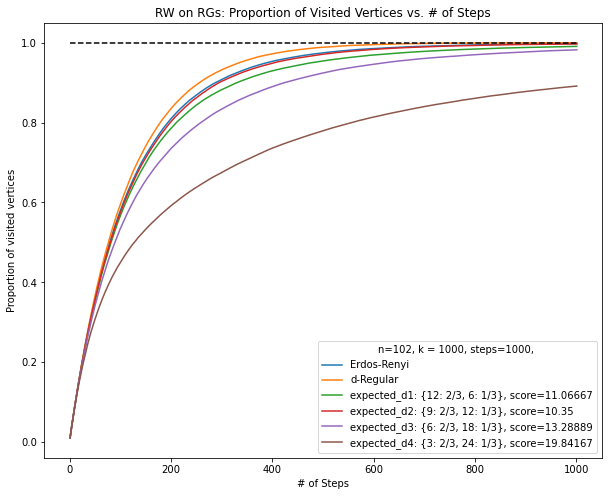

In [58]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {12: 2/3, 6: 1/3}, {9: 2/3, 12:1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {12: 2/3, 6: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {9: 2/3, 12: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {6: 2/3, 18: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {3: 2/3, 24: 1/3}, score='+str(score(d_p4, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(0,250)
plt.show()

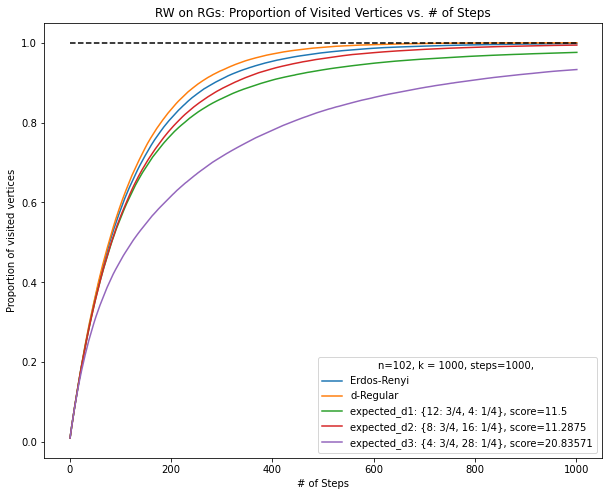

In [59]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {12: 3/4, 4: 1/4}, {8: 3/4, 16: 1/4}, {4: 3/4, 28: 1/4}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {12: 3/4, 4: 1/4}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {8: 3/4, 16: 1/4}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {4: 3/4, 28: 1/4}, score='+str(score(d_p3, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(0,250)
plt.show()

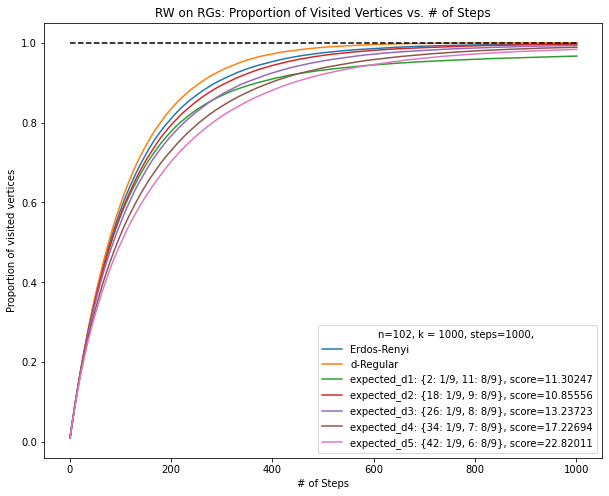

In [60]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {2: 1/9, 11: 8/9}, {18: 1/9, 9: 8/9}, {26: 1/9, 8: 8/9}
d_p4, d_p5 = {34: 1/9, 7: 8/9}, {42: 1/9, 6: 8/9}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {2: 1/9, 11: 8/9}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {18: 1/9, 9: 8/9}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {26: 1/9, 8: 8/9}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {34: 1/9, 7: 8/9}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d5: {42: 1/9, 6: 8/9}, score='+str(score(d_p5, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(0,250)
plt.show()

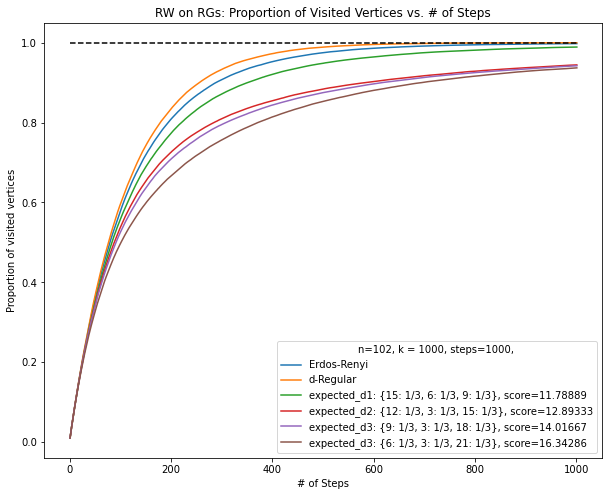

In [62]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {15: 1/3, 6: 1/3, 9: 1/3}, {12: 1/3, 3: 1/3, 15: 1/3}, {9: 1/3, 3: 1/3, 18: 1/3}
d_p4 = {6: 1/3, 3: 1/3, 21: 1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {15: 1/3, 6: 1/3, 9: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {12: 1/3, 3: 1/3, 15: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {9: 1/3, 3: 1/3, 18: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d3: {6: 1/3, 3: 1/3, 21: 1/3}, score='+str(score(d_p4, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(0,250)
plt.show()

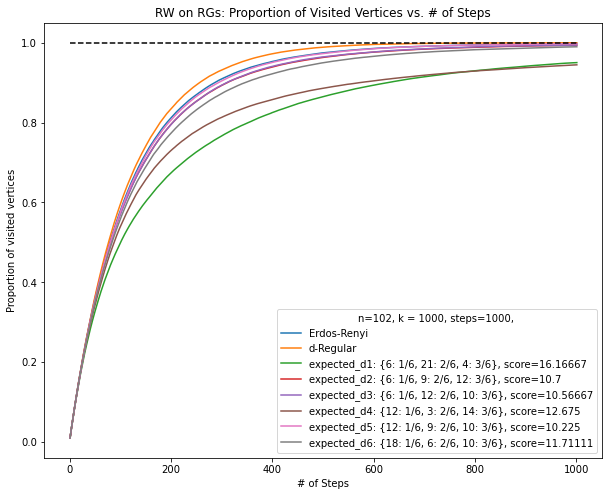

In [65]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {6: 1/6, 21: 2/6, 4: 3/6}, {6: 1/6, 9: 2/6, 12: 3/6}, {6: 1/6, 12: 2/6, 10: 3/6}
d_p4, d_p5, d_p6 = {12: 1/6, 3: 2/6, 14: 3/6}, {12: 1/6, 9: 2/6, 10: 3/6}, {18: 1/6, 6: 2/6, 10: 3/6}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
ed6 = Simulator.simulate_w_on_ed_visited_prop(n, d_p6, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {6: 1/6, 21: 2/6, 4: 3/6}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {6: 1/6, 9: 2/6, 12: 3/6}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {6: 1/6, 12: 2/6, 10: 3/6}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {12: 1/6, 3: 2/6, 14: 3/6}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d5: {12: 1/6, 9: 2/6, 10: 3/6}, score='+str(score(d_p5, d)))
plt.plot(t, ed6, label='expected_d6: {18: 1/6, 6: 2/6, 10: 3/6}, score='+str(score(d_p6, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(150,300)
# plt.ylim(0.6, 1)
plt.show()

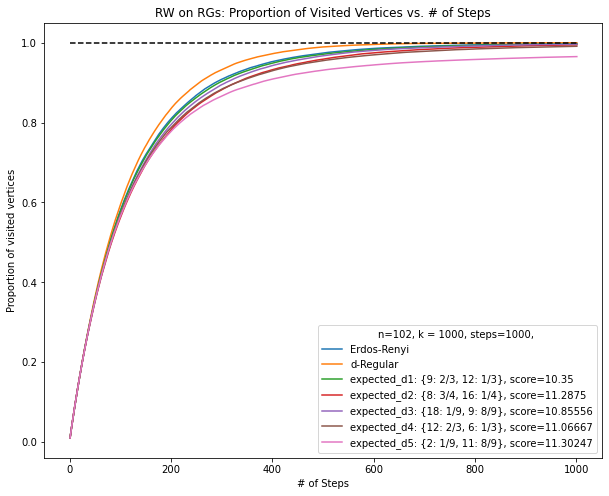

In [66]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {9: 2/3, 12: 1/3}, {8: 3/4, 16: 1/4}, {18: 1/9, 9: 8/9}, {12: 2/3, 6: 1/3}
d_p5 = {2: 1/9, 11: 8/9}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {9: 2/3, 12: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {8: 3/4, 16: 1/4}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {18: 1/9, 9: 8/9}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {12: 2/3, 6: 1/3}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d5: {2: 1/9, 11: 8/9}, score='+str(score(d_p5, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(200,250)
# plt.ylim(0.7, 1)
plt.show()

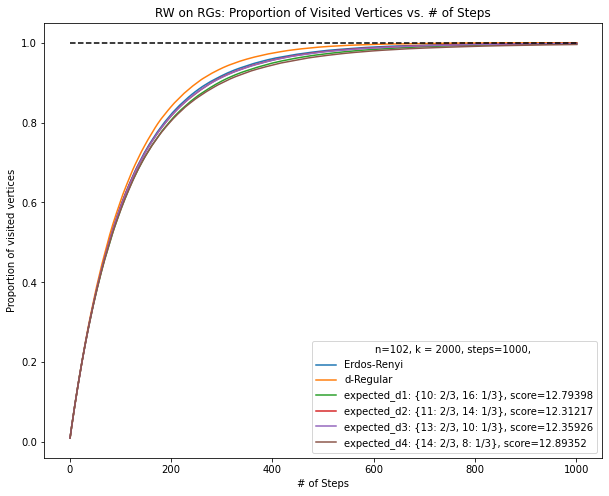

In [67]:
n, d, steps, walker_class, k = 102, 12, 1000, RandomWalker, 2000
d_p1, d_p2, d_p3, d_p4 = {10: 2/3, 16: 1/3}, {11: 2/3, 14: 1/3}, {13: 2/3, 10: 1/3}, {14: 2/3, 8: 1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {10: 2/3, 16: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {11: 2/3, 14: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {13: 2/3, 10: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {14: 2/3, 8: 1/3}, score='+str(score(d_p4, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(200,250)
# plt.ylim(0.7, 1)
plt.show()

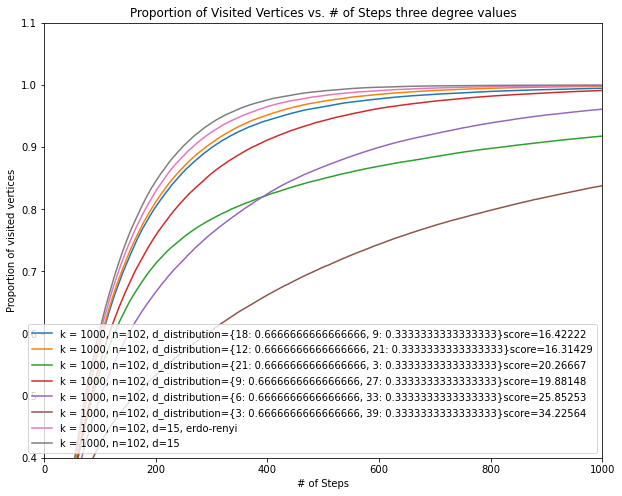

In [51]:
degree_proportion = [{18:2/3, 9:1/3}, {12:2/3, 21:1/3}, {21:2/3, 3:1/3}, {9:2/3, 27:1/3}, {6:2/3, 33:1/3}, {3:2/3, 39:1/3}]
k = 1000
n = 102
steps = 1000
expected_d = 15

er_rw = Simulator.simulate_w_on_rg_visited_prop(n=n, d = expected_d, steps = steps,  walker_class = RandomWalker,k = k)
k_rw = Simulator.simulate_w_on_k_regular_visited_prop(n=n, d = expected_d, steps = steps,  walker_class = RandomWalker,k = k)
t = np.arange(1, len(er_rw)+1, step=1)
for i in range(0, len(degree_proportion)):
    expected_rw = Simulator.simulate_w_on_ed_visited_prop(n = n, d_p = degree_proportion[i], steps = steps, walker_class = RandomWalker,k = k)
    plt.plot(t, expected_rw, label='k = {:d}, n={:d}, d_distribution={}'.format(k, n, degree_proportion[i]) + 'score='+str(score(degree_proportion[i], expected_d)))

plt.plot(t, er_rw, label='k = {:d}, n={:d}, d={:d}, erdo-renyi'.format(k, n, expected_d))
plt.plot(t, k_rw, label='k = {:d}, n={:d}, d={:d}'.format(k, n, expected_d))
plt.ylim([0.4, 1.1])
plt.xlim([0, 1000])
plt.title("Proportion of Visited Vertices vs. # of Steps three degree values")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.legend(loc='lower right')
plt.show()

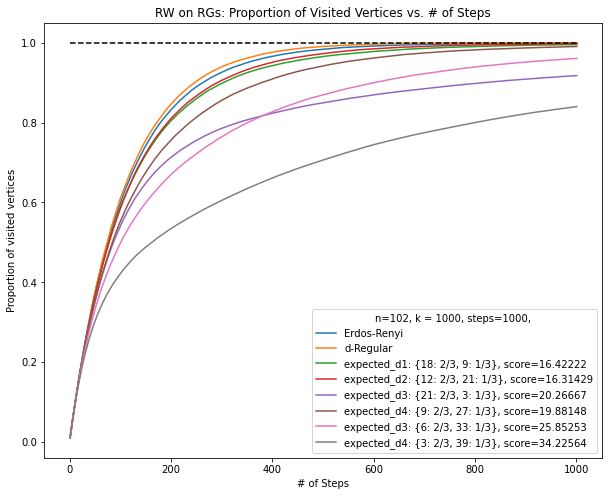

In [68]:
n, d, steps, walker_class, k = 102, 15, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {18:2/3, 9:1/3}, {12:2/3, 21:1/3}, {21:2/3, 3:1/3}, {9:2/3, 27:1/3}
d_p5, d_p6 = {6:2/3, 33:1/3}, {3:2/3, 39:1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
ed6 = Simulator.simulate_w_on_ed_visited_prop(n, d_p6, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {18: 2/3, 9: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {12: 2/3, 21: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {21: 2/3, 3: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {9: 2/3, 27: 1/3}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d3: {6: 2/3, 33: 1/3}, score='+str(score(d_p5, d)))
plt.plot(t, ed6, label='expected_d4: {3: 2/3, 39: 1/3}, score='+str(score(d_p6, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
# plt.xlim(200,250)
# plt.ylim(0.5, 1)
plt.show()